# Imports

In [217]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics, datasets, neural_network, preprocessing, model_selection
import warnings
warnings.filterwarnings('ignore')

# Functions

In [218]:
def normalize(a):
    return (a - np.min(a)) / (np.max(a) - np.min(a))

def slp_probs(x, weights):
    h = x @ weights
    p = 1 / (1 + np.exp(-h))
    return p

def slp_predict(x, weights):
    pred = slp_probs(x, weights)
    if pred.ndim:
        pred[pred < 0.5] = 0
        pred[pred >= 0.5] = 1
    return pred

def slp_train(x, y, iters, alpha):
    eps = 0.1
    weights = np.random.rand(x.shape[1]) * 2 * eps - eps    
    for i in range(iters):
        for j in range(len(x)):
            pred = slp_predict(x[j], weights)
            error = y[j] - pred
            weights = weights + alpha * error * x[j]
    return weights
            
def print_metrics(y, y_pred):
    accuracy = metrics.accuracy_score(y, y_pred) * 100
    f1 = metrics.f1_score(y, y_pred, average='macro')
    print("Accuracy: {:0.2f}%".format(accuracy))
    print("F1 Score:", f1)
    
def train_test_model(model, x_train, y_train, x_test, y_test):
    y_train_nohc = np.argmax(y_train, axis=1)
    y_test_nohc = np.argmax(y_test, axis=1)
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    print("Training Set")
    print_metrics(y_train, y_train_pred)
    print("Testing Set")
    print_metrics(y_test, y_test_pred)
    ax = plt.axes()
    for i in np.unique(y_train_nohc):
        model.fit(x_train, (y_train_nohc == i))
        metrics.plot_roc_curve(model, x_test, (y_test_nohc == i), name='Class ' + str(i), ax = ax)
    plt.show()
    print()

# Loading breast_cancer dataset and preprocessing

In [219]:
x, y = datasets.load_breast_cancer(return_X_y = True)
x = np.apply_along_axis(normalize, 0, x)
x = np.c_[np.ones(len(x)), x]

# Splitting data into training and testing set

In [220]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.3, stratify=y)

# Applying Single Layer Perceptron model on the breast_cancer dataset

In [221]:
alpha = 0.1
iters = 50
weights = slp_train(x_train, y_train, iters, alpha)
y_train_pred = slp_predict(x_train, weights)
y_test_pred = slp_predict(x_test, weights)

# Evaluation metrics

Training Set
Accuracy: 98.24%
F1 Score: 0.9811495652762272
Testing Set
Accuracy: 96.49%
F1 Score: 0.9627721335268504


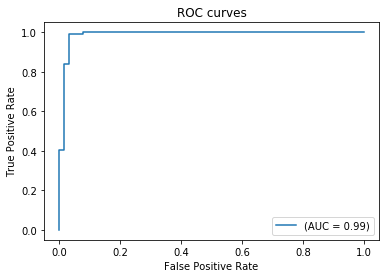

In [222]:
print("Training Set")
print_metrics(y_train, y_train_pred)
print("Testing Set")
print_metrics(y_test, y_test_pred)
ax = plt.axes()
y_test_pred_probs = slp_probs(x_test, weights)
fpr, tpr, _ = metrics.roc_curve(y_test, y_test_pred_probs)
plt.plot(fpr, tpr, label="(AUC = " + str(round(metrics.roc_auc_score(y_test, y_test_pred_probs), 2)) + ")")
plt.legend()
plt.title('ROC curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print()

# Loading MNIST dataset and preprocessing

In [223]:
x, y = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)

x = x / 255.
y = y.astype('int')
enc = preprocessing.OneHotEncoder().fit(y.reshape(-1, 1))
y_ohc = enc.transform(y.reshape(-1, 1)).toarray()

x_train, x_test = x[:60000], x[60000:]
y_train, y_test = y_ohc[:60000], y_ohc[60000:]

# Applying Multi Layer Perceptron model on MNIST dataset



Hidden layer size: 1
Training Set
Accuracy: 13.20%
F1 Score: 0.13273600752893336
Testing Set
Accuracy: 12.95%
F1 Score: 0.13153463249056338


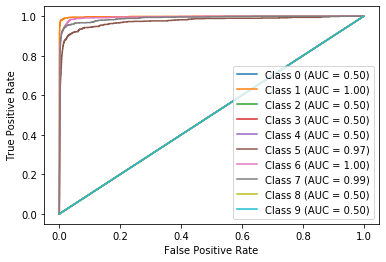




Hidden layer size: 2
Training Set
Accuracy: 9.02%
F1 Score: 0.09607280520411972
Testing Set
Accuracy: 8.83%
F1 Score: 0.09588474695839291


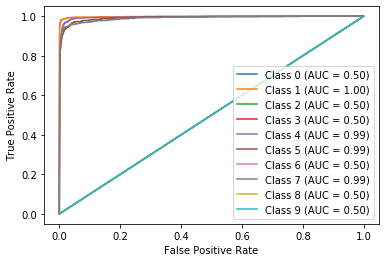




Hidden layer size: 5
Training Set
Accuracy: 20.38%
F1 Score: 0.2512613561557343
Testing Set
Accuracy: 19.74%
F1 Score: 0.24822946840576127


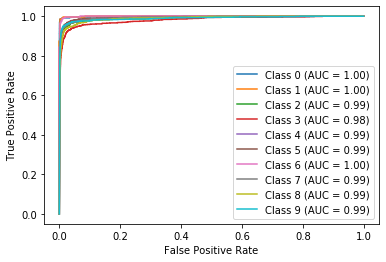




Hidden layer size: 10
Training Set
Accuracy: 71.44%
F1 Score: 0.8018465725955659
Testing Set
Accuracy: 71.15%
F1 Score: 0.8007785165201012


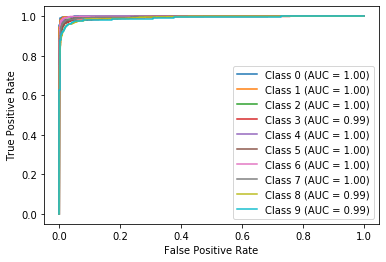




Hidden layer size: 25
Training Set
Accuracy: 87.17%
F1 Score: 0.9149807470747833
Testing Set
Accuracy: 87.18%
F1 Score: 0.9138316675598936


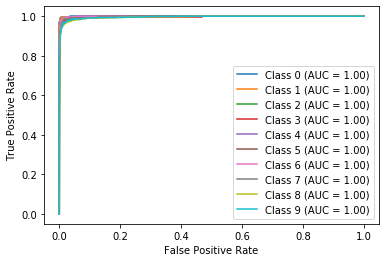

In [224]:
layer_sizes = [1, 2, 5, 10, 25]
for i in layer_sizes:
    print("\n\nHidden layer size:", i)
    mlp = neural_network.MLPClassifier(hidden_layer_sizes=(i,), learning_rate_init=0.01, max_iter=3)
    train_test_model(mlp, x_train, y_train, x_test, y_test)

# Observations

>- **_Accuracy increases with increase in the number of units in the hidden layer._**  
>- **_With only 1 unit in the hidden layer, the accuracy is just slightly better than a random guess, however with 25 units in the hidden layer, the accuracy improves to 87%(with three iterations)._**